In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Life_Exp.csv',skiprows=4)

In [3]:
data.drop(columns=['Indicator Code','Country Code'],axis=1,inplace=True)

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
data

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,"Life expectancy at birth, total (years)",65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000,NaN,NaN
1,Africa Eastern and Southern,"Life expectancy at birth, total (years)",42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.097850,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702,NaN,NaN
2,Afghanistan,"Life expectancy at birth, total (years)",32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000,NaN,NaN
3,Africa Western and Central,"Life expectancy at birth, total (years)",37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,40.914215,41.365117,41.837214,42.327043,42.829077,43.339219,43.855042,44.373966,44.892226,45.402681,45.897475,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,48.816999,48.885934,48.923416,48.933708,48.925505,48.909937,48.899875,48.909130,48.955339,49.052639,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953,NaN,NaN
4,Angola,"Life expectancy at birth, total (years)",37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [6]:
data_life_expectancy=data.iloc[:,:-2]

In [7]:
data_life_expectancy.isna().sum()

Country Name       0
Indicator Name     0
1960              29
1961              28
1962              28
                  ..
2016              17
2017              18
2018              19
2019              19
2020              19
Length: 63, dtype: int64

In [8]:
data_life_expectancy

,Country Name,Indicator Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,"Life expectancy at birth, total (years)",65.662000,66.074000,66.444000,66.787000,67.113000,67.435000,67.762000,68.095000,68.436000,68.784000,69.140000,69.498000,69.851000,70.191000,70.519000,70.833000,71.140000,71.441000,71.736000,72.023000,72.293000,72.538000,72.751000,72.929000,73.071000,73.181000,73.262000,73.325000,73.378000,73.425000,73.468000,73.509000,73.544000,73.573000,73.598000,73.622000,73.646000,73.671000,73.700000,73.738000,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000,76.434000
1,Africa Eastern and Southern,"Life expectancy at birth, total (years)",42.716053,43.166935,43.603990,44.025617,44.432721,44.826919,45.213048,45.594294,45.974059,46.352399,46.728797,47.102866,47.471168,47.829403,48.174999,48.503311,48.810837,49.097850,49.366328,49.619997,49.870693,50.115886,50.363456,50.610385,50.848335,51.058057,51.214281,51.299781,51.308595,51.251763,51.154113,51.048414,50.957262,50.890246,50.841865,50.808484,50.796157,50.820614,50.897607,51.044191,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213,64.325702
2,Afghanistan,"Life expectancy at birth, total (years)",32.446000,32.962000,33.471000,33.971000,34.463000,34.948000,35.430000,35.914000,36.403000,36.900000,37.409000,37.930000,38.461000,39.003000,39.558000,40.128000,40.715000,41.320000,41.944000,42.585000,43.244000,43.923000,44.617000,45.324000,46.040000,46.761000,47.486000,48.211000,48.930000,49.640000,50.331000,50.999000,51.641000,52.256000,52.842000,53.398000,53.924000,54.424000,54.906000,55.376000,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000,65.173000
3,Africa Western and Central,"Life expectancy at birth, total (years)",37.205380,37.632546,38.052612,38.463746,38.867073,39.264841,39.662762,40.066408,40.482832,40.914215,41.365117,41.837214,42.327043,42.829077,43.339219,43.855042,44.373966,44.892226,45.402681,45.897475,46.366104,46.798292,47.188618,47.533985,47.830536,48.079381,48.284581,48.454128,48.597421,48.719231,48.816999,48.885934,48.923416,48.933708,48.925505,48.909937,48.899875,48.909130,48.955339,49.052639,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723,58.445953
4,Angola,"Life expectancy at birth, total (years)",37.524000,37.811000,38.113000,38.430000,38.760000,39.102000,39.454000,39.813000,40.178000,40.546000,40.914000,41.282000,41.650000,42.016000,42.374000,42.721000,43.053000,43.367000,43.660000,43.931000,44.178000,44.404000,44.611000,44.799000,44.966000,45.107000,45.213000,45.283000,45.317000,45.324000,45.306000,45.271000,45.230000,45.201000,45.201000,45.246000,45.350000,45.519000,45.763000,46.093000,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000,61.487000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,"Life expectancy at birth, total (years)",NaN,NaN

In [9]:
data_life_expectancy=data_life_expectancy.drop(columns='Indicator Name',axis=1)

In [10]:
data_life_expectancy_1=data_life_expectancy.iloc[:,:1]

In [11]:
data_life_expectancy_1

,Country Name
0,Aruba
1,Africa Eastern and Southern
2,Afghanistan
3,Africa Western and Central
4,Angola
...,...
261,Kosovo
262,"Yemen, Rep."
263,South Africa
264,Zambia


In [12]:
data_life_expectancy_2=data_life_expectancy.loc[:,'2000':'2019']

In [13]:
data_life_expectancy_2

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000
1,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213
2,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000
3,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723
4,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,67.951220,67.997561,67.943902,68.195122,68.495122,68.695122,68.946341,69.197561,69.448780,69.648780,69.900000,70.200000,70.497561,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683
262,60.683000,61.216000,61.781000,62.358000,62.931000,63.481000,63.997000,64.470000,64.892000,65.255000,65.549000,65.768000,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000
263,56.048000,55.089000,54.310000,53.749000,53.444000,53.447000,53.795000,54.452000,55.360000,56.460000,57.669000,58.895000,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000
264,44.000000,44.615000,45.400000,46.322000,47.354000,48.496000,49.757000,51.134000,52.606000,54.130000,55.655000,57.126000,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000


In [14]:
final_data_life=pd.concat([data_life_expectancy_1,data_life_expectancy_2],axis=1)

In [15]:
final_data_life

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000
1,Africa Eastern and Southern,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213
2,Afghanistan,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000
3,Africa Western and Central,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723
4,Angola,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,67.951220,67.997561,67.943902,68.195122,68.495122,68.695122,68.946341,69.197561,69.448780,69.648780,69.900000,70.200000,70.497561,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683
262,"Yemen, Rep.",60.683000,61.216000,61.781000,62.358000,62.931000,63.481000,63.997000,64.470000,64.892000,65.255000,65.549000,65.768000,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000
263,South Africa,56.048000,55.089000,54.310000,53.749000,53.444000,53.447000,53.795000,54.452000,55.360000,56.460000,57.669000,58.895000,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000
264,Zambia,44.000000,44.615000,45.400000,46.322000,47.354000,48.496000,49.757000,51.134000,52.606000,54.130000,55.655000,57.126000,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000


In [16]:
# Finding the rows with large number on NA values and therefore irrelevant for our analysis
final_data_life.loc[final_data_life.iloc[:,1:].isnull().all(1)]




,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Gibraltar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,Not classified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,Monaco,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,Nauru,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
212,San Marino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,Turks and Caicos Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
245,Tuvalu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
country_to_delete=final_data_life.loc[final_data_life.iloc[:,1:].isnull().all(1)]['Country Name']

In [18]:
#After deleting irrelevant rows
final_data_life=final_data_life[~final_data_life['Country Name'].isin(country_to_delete)]


In [19]:
final_data_life.isna().sum()


Country Name    0
2000            6
2001            8
2002            5
2003            8
2004            8
2005            7
2006            7
2007            6
2008            6
2009            6
2010            7
2011            7
2012            6
2013            7
2014            6
2015            6
2016            6
2017            7
2018            8
2019            8
dtype: int64

In [20]:
final_data_life

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,73.787000,73.853000,73.937000,74.038000,74.156000,74.287000,74.429000,74.576000,74.725000,74.872000,75.017000,75.158000,75.299000,75.441000,75.583000,75.725000,75.868000,76.010000,76.152000,76.293000
1,Africa Eastern and Southern,51.276129,51.606458,52.043149,52.585853,53.228913,53.966550,54.791707,55.682344,56.609799,57.548772,58.470697,59.353595,60.185561,60.953363,61.647367,62.259288,62.787681,63.246264,63.648988,64.005213
2,Afghanistan,55.841000,56.308000,56.784000,57.271000,57.772000,58.290000,58.826000,59.375000,59.930000,60.484000,61.028000,61.553000,62.054000,62.525000,62.966000,63.377000,63.763000,64.130000,64.486000,64.833000
3,Africa Western and Central,49.219714,49.475136,49.816929,50.239432,50.733417,51.283487,51.868203,52.463958,53.049500,53.612090,54.144307,54.649998,55.138944,55.618986,56.088269,56.542009,56.974761,57.382363,57.762347,58.115723
4,Angola,46.522000,47.059000,47.702000,48.440000,49.263000,50.165000,51.143000,52.177000,53.243000,54.311000,55.350000,56.330000,57.236000,58.054000,58.776000,59.398000,59.925000,60.379000,60.782000,61.147000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,67.951220,67.997561,67.943902,68.195122,68.495122,68.695122,68.946341,69.197561,69.448780,69.648780,69.900000,70.200000,70.497561,70.797561,71.097561,71.346341,71.846341,72.295122,72.695122,73.092683
262,"Yemen, Rep.",60.683000,61.216000,61.781000,62.358000,62.931000,63.481000,63.997000,64.470000,64.892000,65.255000,65.549000,65.768000,65.920000,66.016000,66.066000,66.085000,66.087000,66.086000,66.096000,66.125000
263,South Africa,56.048000,55.089000,54.310000,53.749000,53.444000,53.447000,53.795000,54.452000,55.360000,56.460000,57.669000,58.895000,60.060000,61.099000,61.968000,62.649000,63.153000,63.538000,63.857000,64.131000
264,Zambia,44.000000,44.615000,45.400000,46.322000,47.354000,48.496000,49.757000,51.134000,52.606000,54.130000,55.655000,57.126000,58.502000,59.746000,60.831000,61.737000,62.464000,63.043000,63.510000,63.886000


In [21]:
final_data_life.columns

Index(['Country Name', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019'],
      dtype='object')

In [22]:
# Transposing the data for a while so that we can fill the missing value of a particular country with mean value
final_data_life=final_data_life.set_index('Country Name').T

In [23]:
final_data_life

Country Name,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,73.787,51.276129,55.841,49.219714,46.522,73.955,67.800591,74.327,73.576,71.409,73.940,79.234146,78.126829,66.763,49.091,77.721951,55.391,50.489,65.447,71.663415,74.440,71.914,74.403,68.912195,68.847,77.885366,62.452,70.116,77.162,72.809,60.884,50.629,44.190,79.136585,72.719725,79.680488,79.037,76.366,71.397,49.635,50.993,50.041,52.123,72.945,59.460,68.583,77.452,71.419179,76.699,NaN,NaN,78.009,74.968293,77.926829,57.022,NaN,76.592683,69.429,70.640,70.136177,64.403077,71.171919,67.337566,73.028948,72.761,68.602,78.275070,55.273,78.965854,70.417

In [24]:
final_data_life = final_data_life.rename_axis(None, axis=1)
final_data_life

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,73.787,51.276129,55.841,49.219714,46.522,73.955,67.800591,74.327,73.576,71.409,73.940,79.234146,78.126829,66.763,49.091,77.721951,55.391,50.489,65.447,71.663415,74.440,71.914,74.403,68.912195,68.847,77.885366,62.452,70.116,77.162,72.809,60.884,50.629,44.190,79.136585,72.719725,79.680488,79.037,76.366,71.397,49.635,50.993,50.041,52.123,72.945,59.460,68.583,77.452,71.419179,76.699,NaN,NaN,78.009,74.968293,77.926829,57.022,NaN,76.592683,69.429,70.640,70.136177,64.403077,71.171919,67.337566,73.028948,72.761,68.602,78.275070,55.273,78.965854,70.417073,51.941,7

In [25]:
final_data_life.isna().sum()

Aruba                          0
Africa Eastern and Southern    0
Afghanistan                    0
Africa Western and Central     0
Angola                         0
                              ..
Kosovo                         0
Yemen, Rep.                    0
South Africa                   0
Zambia                         0
Zimbabwe                       0
Length: 255, dtype: int64

In [26]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit_transform(final_data_life)

In [27]:
for i in final_data_life.columns:
    final_data_life[i]= imp_mean.fit_transform(final_data_life[i].values.reshape(-1,1))[:,0]

In [28]:
final_data_life.isna().sum()

Aruba                          0
Africa Eastern and Southern    0
Afghanistan                    0
Africa Western and Central     0
Angola                         0
                              ..
Kosovo                         0
Yemen, Rep.                    0
South Africa                   0
Zambia                         0
Zimbabwe                       0
Length: 255, dtype: int64

In [29]:
# final_data_life=final_data_life.T.reset_index()

In [30]:
final_data_life  # After removing all the NA values by imputation of mean and removal of rows.

,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,73.787,51.276129,55.841,49.219714,46.522,73.955,67.800591,74.327,73.576,71.409,73.940,79.234146,78.126829,66.763,49.091,77.721951,55.391,50.489,65.447,71.663415,74.440,71.914,74.403,68.912195,68.847,77.885366,62.452,70.116,77.162,72.809,60.884,50.629,44.190,79.136585,72.719725,79.680488,79.037,76.366,71.397,49.635,50.993,50.041,52.123,72.945,59.460,68.583,77.452,71.419179,76.699,76.922838,82.190244,78.009,74.968293,77.926829,57.022,76.597561,76.592683,69.429,70.640,70.136177,64.403077,71.171919,67.337566,73.028948,72.761,68.602,78.275070,55.273,78.965854,

In [31]:
final_data_life=final_data_life.reset_index()

In [32]:
final_data_life.rename(columns={'index':'year'},inplace=True)



In [33]:
final_data_life

,year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,73.787,51.276129,55.841,49.219714,46.522,73.955,67.800591,74.327,73.576,71.409,73.940,79.234146,78.126829,66.763,49.091,77.721951,55.391,50.489,65.447,71.663415,74.440,71.914,74.403,68.912195,68.847,77.885366,62.452,70.116,77.162,72.809,60.884,50.629,44.190,79.136585,72.719725,79.680488,79.037,76.366,71.397,49.635,50.993,50.041,52.123,72.945,59.460,68.583,77.452,71.419179,76.699,76.922838,82.190244,78.009,74.968293,77.926829,57.022,76.597561,76.592683,69.429,70.640,70.136177,64.403077,71.171919,67.337566,73.028948,72.761,68.602,78.275070,55.273,78.

In [34]:
#Now, we will fill these values with mean values of those columns

In [35]:
# Uploading the Second datasets

In [36]:
health_data=pd.read_csv('Health_expen.csv',skiprows=4)

In [37]:
health_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Aruba,ABW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.195249,38.938471,35.958962,51.549980,63.531276,70.451047,77.243024,86.506159,88.911288,92.884919,107.706700,118.269210,113.183637,111.227695,104.541257,99.008506,94.739159,102.410661,96.289480,91.970113,NaN,NaN,NaN
2,Afghanistan,AFG,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.803164,17.035744,20.412764,23.890501,27.836571,31.271839,38.102661,41.722744,44.990532,50.853474,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,69.998604,65.806030,NaN,NaN,NaN
3,Africa Western and Central,AFW,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.362792,21.034545,22.119771,34.068933,38.689287,44.220128,50.846892,55.246970,63.805885,57.641894,61.421540,68.678383,71.039947,78.746863,81.804505,73.297775,63.649069,60.968846,59.328810,61.338476,NaN,NaN,NaN
4,Angola,AGO,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.998967,28.918121,29.049364,34.875187,49.810741,54.260777,69.812302,92.860306,135.605820,119.996284,96.697014,122.107231,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.310738,71.326004,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.827745,27.195436,28.017159,35.718384,39.152393,43.375885,51.000786,59.230652,70.828186,66.811066,68.865936,65.563004,75.143700,79.728119,81.051949,73.176743,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,Current health expenditure per capita (current...,SH.XPD.CHEX.PC.CD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247.589233,211.691559,186.781479,296.924377,375.308380,413.998962,430.915649,468.230072,453.963898,499.717773,635.094116,699.967529,658

In [38]:
health_data.drop(columns=['Indicator Name','Indicator Code','Country Code'],axis=1,inplace=True)

In [39]:
health_data=health_data.iloc[:,:-3]

In [40]:
health_data_1=health_data.iloc[:,:1]

In [41]:
health_data_2=health_data.loc[:,'2000':'2019']

In [42]:
final_health_data=pd.concat([health_data_1,health_data_2],axis=1)

In [43]:
final_health_data

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,44.195249,38.938471,35.958962,51.549980,63.531276,70.451047,77.243024,86.506159,88.911288,92.884919,107.706700,118.269210,113.183637,111.227695,104.541257,99.008506,94.739159,102.410661,96.289480,91.970113
2,Afghanistan,NaN,NaN,15.803164,17.035744,20.412764,23.890501,27.836571,31.271839,38.102661,41.722744,44.990532,50.853474,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,69.998604,65.806030
3,Africa Western and Central,20.362792,21.034545,22.119771,34.068933,38.689287,44.220128,50.846892,55.246970,63.805885,57.641894,61.421540,68.678383,71.039947,78.746863,81.804505,73.297775,63.649069,60.968846,59.328810,61.338476
4,Angola,12.998967,28.918121,29.049364,34.875187,49.810741,54.260777,69.812302,92.860306,135.605820,119.996284,96.697014,122.107231,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.310738,71.326004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",25.827745,27.195436,28.017159,35.718384,39.152393,43.375885,51.000786,59.230652,70.828186,66.811066,68.865936,65.563004,75.143700,79.728119,81.051949,73.176743,NaN,NaN,NaN,NaN
263,South Africa,247.589233,211.691559,186.781479,296.924377,375.308380,413.998962,430.915649,468.230072,453.963898,499.717773,635.094116,699.967529,658.122986,604.769897,549.696167,503.759460,465.088104,534.388367,564.503296,546.688416
264,Zambia,24.724640,25.092323,25.969627,31.309769,37.970741,48.214775,61.575523,48.946644,55.939053,51.357811,55.392830,57.880146,69.295303,88.128204,67.496788,59.337643,57.362690,67.195236,76.314423,69.324379


In [44]:
country_to_delete_from_health=final_health_data.loc[final_health_data.iloc[:,1:].isnull().all(1)]['Country Name']

In [45]:
#After deleting irrelevant rows
final_health_data=final_health_data[~final_health_data['Country Name'].isin(country_to_delete_from_health)]



In [46]:
final_health_data

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
1,Africa Eastern and Southern,44.195249,38.938471,35.958962,51.549980,63.531276,70.451047,77.243024,86.506159,88.911288,92.884919,107.706700,118.269210,113.183637,111.227695,104.541257,99.008506,94.739159,102.410661,96.289480,91.970113
2,Afghanistan,NaN,NaN,15.803164,17.035744,20.412764,23.890501,27.836571,31.271839,38.102661,41.722744,44.990532,50.853474,51.440262,55.034630,59.008934,58.906528,60.188671,65.706024,69.998604,65.806030
3,Africa Western and Central,20.362792,21.034545,22.119771,34.068933,38.689287,44.220128,50.846892,55.246970,63.805885,57.641894,61.421540,68.678383,71.039947,78.746863,81.804505,73.297775,63.649069,60.968846,59.328810,61.338476
4,Angola,12.998967,28.918121,29.049364,34.875187,49.810741,54.260777,69.812302,92.860306,135.605820,119.996284,96.697014,122.107231,122.185585,143.606873,131.647659,108.582939,95.124977,114.334602,87.310738,71.326004
5,Albania,80.616951,89.580734,96.271118,125.987976,156.568176,165.265366,174.530243,222.303665,220.464249,186.442810,192.003220,211.075516,213.719742,236.957962,251.358261,192.885132,202.013321,226.280670,274.914093,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Samoa,63.036682,58.871178,76.199806,85.765770,109.059746,126.317490,138.659790,153.515366,163.009033,179.214920,192.767914,220.382812,205.075577,257.409088,259.162323,223.180969,227.125092,235.418381,227.313065,271.915771
262,"Yemen, Rep.",25.827745,27.195436,28.017159,35.718384,39.152393,43.375885,51.000786,59.230652,70.828186,66.811066,68.865936,65.563004,75.143700,79.728119,81.051949,73.176743,NaN,NaN,NaN,NaN
263,South Africa,247.589233,211.691559,186.781479,296.924377,375.308380,413.998962,430.915649,468.230072,453.963898,499.717773,635.094116,699.967529,658.122986,604.769897,549.696167,503.759460,465.088104,534.388367,564.503296,546.688416
264,Zambia,24.724640,25.092323,25.969627,31.309769,37.970741,48.214775,61.575523,48.946644,55.939053,51.357811,55.392830,57.880146,69.295303,88.128204,67.496788,59.337643,57.362690,67.195236,76.314423,69.324379


In [47]:
# Transposing the data for a while so that we can fill the missing value of a particular country with mean value
final_health_data=final_health_data.set_index('Country Name').T

In [48]:
final_health_data = final_health_data.rename_axis(None, axis=1)
final_health_data

,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Guatemala,Guyana,High income,Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,Morocco,Monaco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,Nauru,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Portugal,Paraguay,Pacific island small states,Post-demographic dividend,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,44.195249,NaN,20.362792,12.998967,80.616951,1302.620728,113.338487,787.021118,708.769531,26.129089,512.568298,1638.814941,2269.126465,19.141718,8.428346,1849.916016,15.906764,7.544381,8.560262,94.497452,485.686462,1030.968994,113.313263,57.668167,132.707459,43.848438,312.539276,600.808960,508.548401,30.893509,205.237152,10.185171,2007.880859,221.140527,3559.819824,356.963776,42.112404,55.296200,28.003763,19.868258,17.483683,132.879715,47.002361,63.034405,248.753418,254.427456,180.811218,750.516724,342.921051,2344.354736,31.957985,254.785553,2496.047119,140.138855,61.582180,37.885522,67.229625,239.077461,91.867426,939.872498,48.120625,73.656845,1750.663447,13.752577,1005.283997,209.713135,5.384495,1432.315498,38.498393,1722.832642,77.024727,2161.853027,168.457855,127.961372,2029.524902,51.852818,16.601141,23.258804,50.868637,21.972588,41.0

In [49]:
final_data_life

,year,Aruba,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bermuda,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Channel Islands,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Curacao,Cayman Islands,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,Faroe Islands,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Greenland,Guatemala,Guam,Guyana,High income,"Hong Kong SAR, China",Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,Isle of Man,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Liechtenstein,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,"Macao SAR, China",St. Martin (French part),Morocco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,New Caledonia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Puerto Rico,"Korea, Dem. People's Rep.",Portugal,Paraguay,West Bank and Gaza,Pacific island small states,Post-demographic dividend,French Polynesia,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,Somalia,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Sint Maarten (Dutch part),Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,73.787,51.276129,55.841,49.219714,46.522,73.955,67.800591,74.327,73.576,71.409,73.940,79.234146,78.126829,66.763,49.091,77.721951,55.391,50.489,65.447,71.663415,74.440,71.914,74.403,68.912195,68.847,77.885366,62.452,70.116,77.162,72.809,60.884,50.629,44.190,79.136585,72.719725,79.680488,79.037,76.366,71.397,49.635,50.993,50.041,52.123,72.945,59.460,68.583,77.452,71.419179,76.699,76.922838,82.190244,78.009,74.968293,77.926829,57.022,76.597561,76.592683,69.429,70.640,70.136177,64.403077,71.171919,67.337566,73.028948,72.761,68.602,78.275070,55.273,78.

In [50]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# imp_mean.fit_transform(final_data_life)

In [51]:
for i in final_health_data.columns:
    final_health_data[i]= imp_mean.fit_transform(final_health_data[i].values.reshape(-1,1))[:,0]

In [52]:
final_health_data.isna().sum()

Africa Eastern and Southern    0
Afghanistan                    0
Africa Western and Central     0
Angola                         0
Albania                        0
                              ..
Samoa                          0
Yemen, Rep.                    0
South Africa                   0
Zambia                         0
Zimbabwe                       0
Length: 238, dtype: int64

In [53]:
# Data is cleaned now

In [54]:
final_health_data

,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Guatemala,Guyana,High income,Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,Morocco,Monaco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,Nauru,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Portugal,Paraguay,Pacific island small states,Post-demographic dividend,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
2000,44.195249,44.333871,20.362792,12.998967,80.616951,1302.620728,113.338487,787.021118,708.769531,26.129089,512.568298,1638.814941,2269.126465,19.141718,8.428346,1849.916016,15.906764,7.544381,8.560262,94.497452,485.686462,1030.968994,113.313263,57.668167,132.707459,43.848438,312.539276,600.808960,508.548401,30.893509,205.237152,10.185171,2007.880859,221.140527,3559.819824,356.963776,42.112404,55.296200,28.003763,19.868258,17.483683,132.879715,47.002361,63.034405,248.753418,254.427456,180.811218,750.516724,342.921051,2344.354736,31.957985,254.785553,2496.047119,140.138855,61.582180,37.885522,67.229625,239.077461,91.867426,939.872498,48.120625,73.656845,1750.663447,13.752577,1005.283997,209.713135,5.384495,1432.315498,38.498393,1722.832642,77.024727,2161.853027,168.457855,127.961372,2029.524902,51.852818,16.601141,23.258804,50.868637,21.97258

In [55]:
final_health_data=final_health_data.reset_index()

In [56]:
final_health_data.rename(columns={'index':'year'},inplace=True)


In [57]:
final_health_data

,year,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Andorra,Arab World,United Arab Emirates,Argentina,Armenia,Antigua and Barbuda,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Burkina Faso,Bangladesh,Bulgaria,Bahrain,"Bahamas, The",Bosnia and Herzegovina,Belarus,Belize,Bolivia,Brazil,Barbados,Brunei Darussalam,Bhutan,Botswana,Central African Republic,Canada,Central Europe and the Baltics,Switzerland,Chile,China,Cote d'Ivoire,Cameroon,"Congo, Dem. Rep.","Congo, Rep.",Colombia,Comoros,Cabo Verde,Costa Rica,Caribbean small states,Cuba,Cyprus,Czechia,Germany,Djibouti,Dominica,Denmark,Dominican Republic,Algeria,East Asia & Pacific (excluding high income),Early-demographic dividend,East Asia & Pacific,Europe & Central Asia (excluding high income),Europe & Central Asia,Ecuador,"Egypt, Arab Rep.",Euro area,Eritrea,Spain,Estonia,Ethiopia,European Union,Fragile and conflict affected situations,Finland,Fiji,France,"Micronesia, Fed. Sts.",Gabon,United Kingdom,Georgia,Ghana,Guinea,"Gambia, The",Guinea-Bissau,Equatorial Guinea,Greece,Grenada,Guatemala,Guyana,High income,Honduras,Heavily indebted poor countries (HIPC),Croatia,Haiti,Hungary,IBRD only,IDA & IBRD total,IDA total,IDA blend,Indonesia,IDA only,India,Ireland,"Iran, Islamic Rep.",Iraq,Iceland,Israel,Italy,Jamaica,Jordan,Japan,Kazakhstan,Kenya,Kyrgyz Republic,Cambodia,Kiribati,St. Kitts and Nevis,"Korea, Rep.",Kuwait,Latin America & Caribbean (excluding high income),Lao PDR,Lebanon,Liberia,Libya,St. Lucia,Latin America & Caribbean,Least developed countries: UN classification,Low income,Sri Lanka,Lower middle income,Low & middle income,Lesotho,Late-demographic dividend,Lithuania,Luxembourg,Latvia,Morocco,Monaco,Moldova,Madagascar,Maldives,Middle East & North Africa,Mexico,Marshall Islands,Middle income,North Macedonia,Mali,Malta,Myanmar,Middle East & North Africa (excluding high income),Montenegro,Mongolia,Mozambique,Mauritania,Mauritius,Malawi,Malaysia,North America,Namibia,Niger,Nigeria,Nicaragua,Netherlands,Norway,Nepal,Nauru,New Zealand,OECD members,Oman,Other small states,Pakistan,Panama,Peru,Philippines,Palau,Papua New Guinea,Poland,Pre-demographic dividend,Portugal,Paraguay,Pacific island small states,Post-demographic dividend,Qatar,Romania,Russian Federation,Rwanda,South Asia,Saudi Arabia,Sudan,Senegal,Singapore,Solomon Islands,Sierra Leone,El Salvador,San Marino,Serbia,Sub-Saharan Africa (excluding high income),South Sudan,Sub-Saharan Africa,Small states,Sao Tome and Principe,Suriname,Slovak Republic,Slovenia,Sweden,Eswatini,Seychelles,Syrian Arab Republic,Chad,East Asia & Pacific (IDA & IBRD countries),Europe & Central Asia (IDA & IBRD countries),Togo,Thailand,Tajikistan,Turkmenistan,Latin America & the Caribbean (IDA & IBRD countries),Timor-Leste,Middle East & North Africa (IDA & IBRD countries),Tonga,South Asia (IDA & IBRD),Sub-Saharan Africa (IDA & IBRD countries),Trinidad and Tobago,Tunisia,Turkiye,Tuvalu,Tanzania,Uganda,Ukraine,Upper middle income,Uruguay,United States,Uzbekistan,St. Vincent and the Grenadines,"Venezuela, RB",Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
0,2000,44.195249,44.333871,20.362792,12.998967,80.616951,1302.620728,113.338487,787.021118,708.769531,26.129089,512.568298,1638.814941,2269.126465,19.141718,8.428346,1849.916016,15.906764,7.544381,8.560262,94.497452,485.686462,1030.968994,113.313263,57.668167,132.707459,43.848438,312.539276,600.808960,508.548401,30.893509,205.237152,10.185171,2007.880859,221.140527,3559.819824,356.963776,42.112404,55.296200,28.003763,19.868258,17.483683,132.879715,47.002361,63.034405,248.753418,254.427456,180.811218,750.516724,342.921051,2344.354736,31.957985,254.785553,2496.047119,140.138855,61.582180,37.885522,67.229625,239.077461,91.867426,939.872498,48.120625,73.656845,1750.663447,13.752577,1005.283997,209.713135,5.384495,1432.315498,38.498393,1722.832642,77.024727,2161.853027,168.457855,127.961372,2029.524902,51.852818,16.601141,23.258804,50.868637,2

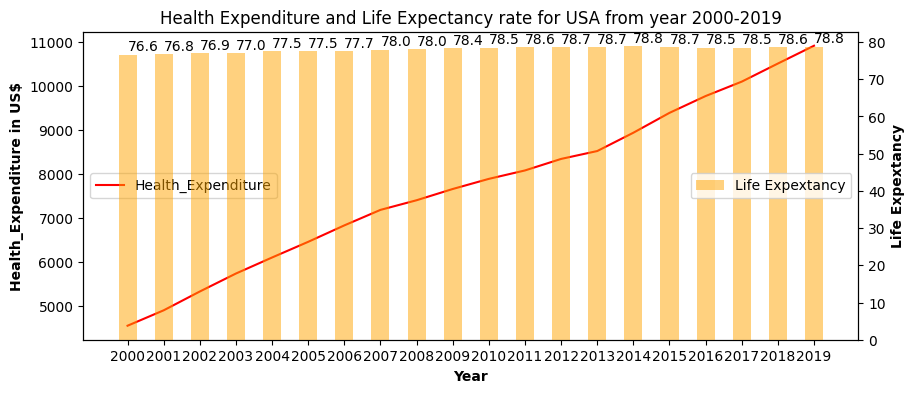

In [58]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(final_health_data['year'], final_health_data['United States'],color='red')
ax1.set_ylabel('Health_Expenditure in US$',fontweight='bold')

ax1.legend(['Health_Expenditure'], loc="center left")

# set up the 2nd axis
ax2 = ax1.twinx()



ax2.bar(final_data_life['year'], final_data_life['United States'], width=0.5, alpha=0.5, color='orange')
# ax2.grid(False)  # turn off grid #2
for index,data in enumerate(final_data_life['United States']):
    plt.text(x=index , y =data+1 , s=f"{round(data,1)}" , fontdict=dict(fontsize=10))
ax2.set_ylabel('Life Expextancy',fontweight='bold')

ax2.legend(['Life Expextancy'], loc="center right")
ax1.title.set_text('Health Expenditure and Life Expectancy rate for USA from year 2000-2019')
ax1.set_xlabel('Year', fontweight='bold')
plt.show()

In [59]:
## For USA the health expenditure is great from very long time so we cant see the trend that much.
## Now, we willl visualize the trend for some small country such as Kenya.

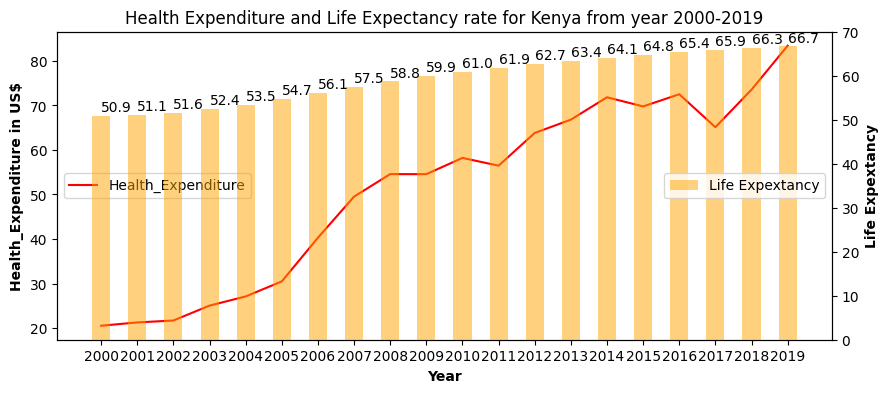

In [60]:
fig, ax1 = plt.subplots(figsize=(10, 4))

ax1.plot(final_health_data['year'], final_health_data['Kenya'],color='red')
ax1.set_ylabel('Health_Expenditure in US$',fontweight='bold')

ax1.legend(['Health_Expenditure'], loc="center left")

# set up the 2nd axis
ax2 = ax1.twinx()



ax2.bar(final_data_life['year'], final_data_life['Kenya'], width=0.5, alpha=0.5, color='orange')
# ax2.grid(False)  # turn off grid #2
for index,data in enumerate(final_data_life['Kenya']):
    plt.text(x=index , y =data+1 , s=f"{round(data,1)}" , fontdict=dict(fontsize=10))
ax2.set_ylabel('Life Expextancy',fontweight='bold')

ax2.legend(['Life Expextancy'], loc="center right")
ax1.title.set_text('Health Expenditure and Life Expectancy rate for Kenya from year 2000-2019')
ax1.set_xlabel('Year', fontweight='bold')
plt.show()

# Exporting to CSV

In [61]:
final_data_life.to_csv('Cleaned_Life_Expectancy.csv', index=False)
final_health_data.to_csv('Cleaned_Health_Expenditure.csv', index=False)